In [1]:
import os
import sys
import math
import gc
import random
import joblib
from datetime import datetime, time
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
from dateutil.relativedelta import relativedelta
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
timeS = joblib.load(os.path.join('..', '..', '0.Data', '01_제공데이터', 'data4time.pkl'))
timeS['방송년도'] = timeS['방송날'].dt.year
timeS['방송월'] = timeS['방송날'].dt.month
timeS['방송일'] =timeS['방송날'].dt.day

In [4]:
sale = pd.read_excel(os.path.join('..', '..', '0.Data', '01_제공데이터', '2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx'), skiprows = 1)

In [5]:
sale = sale.loc[sale['상품군'] != '무형']

In [6]:
sale['방송날'] = sale['방송일시'].dt.date
sale['방송월'] = sale['방송일시'].dt.month
sale['방송일'] = sale['방송일시'].dt.day
sale['방송시간(시간)'] = sale['방송일시'].dt.hour
sale['방송일시'] = sale.apply(lambda x : datetime.combine(x['방송날'], time(x['방송시간(시간)'])), axis = 1)

In [7]:
import math
sale['판매량'] = sale['취급액'] / sale['판매단가']
sale['판매량'] = sale['판매량'].fillna(0).apply(lambda x : math.ceil(x))

In [257]:
piv = pd.pivot_table(sale, index = '상품군', columns = '방송일시', values = '판매량', aggfunc='sum')

In [260]:
pivT = piv.T
ema_s = pivT.ewm(span=4).mean()
ema_m = pivT.ewm(span=12).mean()
ema_l = pivT.ewm(span=26).mean()
macd = ema_s - ema_l
sig = macd.ewm(span=9).mean()
rol14 = pivT.fillna(0).rolling(14).mean()
rol30 = pivT.fillna(0).rolling(30).mean()

In [261]:
for tb, column in zip([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], ['ema_sz', 'ema_mz', 'ema_lz', 'macdz', 'sigz', 'rol14z', 'rol30z']):
    new_columns = list(map(lambda x : '_'.join((column, x)), tb.columns))
    tb.columns = new_columns

In [262]:
timeZ = pd.concat([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], axis = 1).reset_index()

In [12]:
timeZ['방송년도'] = timeZ['방송일시'].dt.year
timeZ['방송월'] = timeZ['방송일시'].dt.month
timeZ['방송일'] =timeZ['방송일시'].dt.day
timeZ['방송시간(시간)'] =timeZ['방송일시'].dt.hour

In [13]:
piv = pd.pivot_table(sale, index = '상품군', columns = '방송시간(시간)', values = '판매량', aggfunc=np.mean)
pivT = piv.T
ema_s = pivT.ewm(span=1).mean()
ema_m = pivT.ewm(span=3).mean()
ema_l = pivT.ewm(span=6).mean()
macd = ema_s - ema_l
sig = macd.ewm(span=3).mean()
rol14 = pivT.fillna(0).rolling(1).mean()
rol30 = pivT.fillna(0).rolling(3).mean()

for tb, column in zip([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], ['ema_st', 'ema_mt', 'ema_lt', 'macdt', 'sigt', 'rol14t', 'rol30t']):
    new_columns = list(map(lambda x : '_'.join((column, x)), tb.columns))
    tb.columns = new_columns

timeT = pd.concat([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], axis = 1).reset_index()

In [14]:
piv = pd.pivot_table(sale, index = '상품군', columns = '방송일시', values = '취급액', aggfunc=np.mean)

pivT = piv.T
ema_s = pivT.ewm(span=4).mean()
ema_m = pivT.ewm(span=12).mean()
ema_l = pivT.ewm(span=26).mean()
macd = ema_s - ema_l
sig = macd.ewm(span=9).mean()
rol14 = pivT.fillna(0).rolling(14).mean()
rol30 = pivT.fillna(0).rolling(30).mean()

for tb, column in zip([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], ['ema_sa', 'ema_ma', 'ema_la', 'macda', 'siga', 'rol14a', 'rol30a']):
    new_columns = list(map(lambda x : '_'.join((column, x)), tb.columns))
    tb.columns = new_columns

timeA = pd.concat([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], axis = 1).reset_index()

In [15]:
timeA['방송년도'] = timeA['방송일시'].dt.year
timeA['방송월'] = timeA['방송일시'].dt.month
timeA['방송일'] =timeA['방송일시'].dt.day
timeA['방송시간(시간)'] =timeA['방송일시'].dt.hour

In [16]:
piv = pd.pivot_table(sale, index = '상품군', columns = '방송시간(시간)', values = '취급액', aggfunc=np.mean)

pivT = piv.T
ema_s = pivT.ewm(span=1).mean()
ema_m = pivT.ewm(span=3).mean()
ema_l = pivT.ewm(span=6).mean()
macd = ema_s - ema_l
sig = macd.ewm(span=9).mean()
rol14 = pivT.fillna(0).rolling(1).mean()
rol30 = pivT.fillna(0).rolling(3).mean()

for tb, column in zip([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], ['ema_saQ', 'ema_maQ', 'ema_laQ', 'macdaQ', 'sigaQ', 'rol14aQ', 'rol30aQ']):
    new_columns = list(map(lambda x : '_'.join((column, x)), tb.columns))
    tb.columns = new_columns

timeQ = pd.concat([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], axis = 1).reset_index()

In [17]:
rate = pd.read_excel(os.path.join('..', '..', '0.Data', '01_제공데이터', '2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx'), skiprows = 1)

In [18]:
rate_v1 = rate.loc[[1440]].T.reset_index().loc[1:365].rename(columns = {'index' : '방송일시', 1440 : '일별평균시청률'})

In [19]:
rate_v2 = rate.iloc[:, -1].reset_index().rename(columns=  {'index' : '시간대', '2019-01-01 to 2019-12-31'  : '분당평균시청률'})
rate_v2['시간대'] = rate['시간대']
rate_v2 = rate_v2.drop(1440)

In [20]:
rate['방송시간(시간)'] = rate['시간대'].apply(lambda x: x[:2])

In [21]:
rate_v3 = rate.groupby('방송시간(시간)').max()
rate_v4 = rate.groupby('방송시간(시간)').mean()
rate_v5 = rate.groupby('방송시간(시간)').median()

In [22]:
rateT = rate.T.reset_index().iloc[:,:-1].loc[:365]

In [23]:
rateT.columns = rateT.loc[0]

In [24]:
rateT = rateT.drop(0)

In [25]:
rateT['방송월'] = pd.to_datetime(rateT['시간대']).dt.month

In [26]:
rateT = rateT.drop('시간대', axis = 1).fillna(0).groupby('방송월').mean().T.reset_index()

In [27]:
rateT['방송시간(시간)'] = rateT[0].apply(lambda x : x[:2])

In [28]:
rate_v6 = rateT.drop(0, axis = 1).groupby('방송시간(시간)').max()
rate_v7 = rateT.drop(0, axis = 1).groupby('방송시간(시간)').mean()
rate_v8 = rateT.drop(0, axis = 1).groupby('방송시간(시간)').median()

In [29]:
prep = pd.read_excel('./prep4wnd.xlsx')

In [30]:
volume_v1 = prep.groupby(['방송월', '방송시간']).agg({
    '판매량' : [('월별시간별평균판매량', np.mean),
            ('월별시간별중간판매량', np.median)],
    '판매단가' : [('월별시간별평균판매단가', np.mean),
             ('월별시간별중간판매단가', np.median)]
}).reset_index()

In [31]:
volume_v2 = prep.groupby(['방송시간']).agg({
    '판매량' : [('시간별평균판매량', np.mean),
            ('시간별중간판매량', np.median)],
    '판매단가' : [('시간별평균판매단가', np.mean),
             ('시간별중간판매단가', np.median)]
}).reset_index()

In [32]:
def prepColumn(df):
    columns = []
    for i, c in enumerate(df.columns):
        if c[1] == '':
            columns.append(c[0])
        else:
            columns.append(c[1])
    df.columns = columns
    return df

In [33]:
volume_v1 = prepColumn(volume_v1)
volume_v2 = prepColumn(volume_v2)

In [34]:
rate_v1 # 일별평균시청률

,방송일시,일별평균시청률
1,2019-01-01,0.004
2,2019-01-02,0.006
3,2019-01-03,0.002
4,2019-01-04,0.003
5,2019-01-05,0.002
...,...,...
361,2019-12-27,0.004
362,2019-12-28,0.006
363,2019-12-29,0.004
364,2019-12-30,0.005


In [35]:
rate_v1['방송월'] = pd.to_datetime(rate_v1['방송일시']).dt.month
rate_v1['방송일'] = pd.to_datetime(rate_v1['방송일시']).dt.day

In [36]:
rate_v3 = rate_v3.iloc[:, 1:-1].drop('월화').T # 일별시간별 최대시청률
rate_v4 = rate_v4.iloc[:, :-1].drop('월화').T # 일별시간별 평균시청률
rate_v5 = rate_v5.iloc[:, :-1].drop('월화').T # 일별시간별 중간시청률

In [ ]:
rate_v6 # 시간별월별 최대시청률
rate_v7 # 시간별월별 평균시청률
rate_v8 # 시간별월별 중간시청률

In [ ]:
volume_v1 # 월별시간별 평균/중간 판매량 및 판매단가
volume_v2 # 시간별 평균/중간 판매량 및 판매단가

In [37]:
train = joblib.load(os.path.join('..', '..', '0.Data', '05_분석데이터', 'train_data4WnD.pkl'))
test = joblib.load(os.path.join('..', '..', '0.Data', '05_분석데이터', 'test_data4WnD.pkl'))

In [38]:
volume = joblib.load(os.path.join('..', '..', '0.Data', '01_제공데이터', 'data4volume.pkl'))

In [39]:
temp_month = volume['volume4month']
temp_hour = volume['volume4hour']
temp_minute = volume['volume4minute']

In [40]:
temp_month.columns = [temp_month.columns[0]] + list(map(lambda x : '월별_'+x, temp_month.columns[1:]))
temp_hour.columns = [temp_hour.columns[0]] + list(map(lambda x : '시간별_'+x, temp_hour.columns[1:]))
temp_minute.columns = [temp_minute.columns[0]] + list(map(lambda x : '분별_'+x, temp_minute.columns[1:]))

In [41]:
rate_v3.columns = np.arange(0, 24)
rate_v4.columns = np.arange(0, 24)
rate_v5.columns = np.arange(0, 24)

In [42]:
rate_v3 = rate_v3.reset_index().rename(columns = {'index' : '방송일시'})
rate_v4 = rate_v4.reset_index().rename(columns = {'index' : '방송일시'})
rate_v5 = rate_v5.reset_index().rename(columns = {'index' : '방송일시'})

In [43]:
rate_v3['방송월'] = pd.to_datetime(rate_v3['방송일시']).dt.month
rate_v3['방송일'] = pd.to_datetime(rate_v3['방송일시']).dt.day
rate_v4['방송월'] = pd.to_datetime(rate_v4['방송일시']).dt.month
rate_v4['방송일'] = pd.to_datetime(rate_v5['방송일시']).dt.day
rate_v5['방송월'] = pd.to_datetime(rate_v5['방송일시']).dt.month
rate_v5['방송일'] = pd.to_datetime(rate_v5['방송일시']).dt.day

In [44]:
rate_v6 = rate_v6.reset_index(drop = True).reset_index().rename(columns = {'index' : '방송시간(시간)'})
rate_v7 = rate_v7.reset_index(drop = True).reset_index().rename(columns = {'index' : '방송시간(시간)'})
rate_v8 = rate_v8.reset_index(drop = True).reset_index().rename(columns = {'index' : '방송시간(시간)'})

In [512]:
joblib.dump({
    'rate_v1' : rate_v1,
    'rate_v2' : rate_v2,
    'rate_v3' : rate_v3,
    'rate_v4' : rate_v4,
    'rate_v5' : rate_v5,
    'rate_v6' : rate_v6,
    'rate_v7' : rate_v7,
    'rate_v8' : rate_v8,
}, os.path.join('..', '..', '0.Data', '01_제공데이터', 'rate4wnd.pkl'))

['../../0.Data/01_제공데이터/rate4wnd.pkl']

# 1. 데이터 전처리

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, MinMaxScaler
from keras.layers import Input, Embedding, Dense, Flatten, Dropout, SpatialDropout1D, Activation, concatenate, Conv2D, Conv1D, Lambda, GlobalMaxPooling1D
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import ReLU, PReLU, LeakyReLU, ELU
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


In [46]:
from keras.metrics import top_k_categorical_accuracy, top_k_categorical_accuracy

In [467]:
COLUMNS = ['방송월',
 '방송일',
 '방송시간(시간)',
 '방송시간(분)',
#  '합계',
#  '컴퓨터 및 주변기기',
#  '가전·전자·통신기기',
#  '서적',
#  '사무·문구',
#  '의복',
#  '신발',
#  '가방',
#  '패션용품 및 액세서리',
#  '스포츠·레저용품',
#  '화장품',
#  '아동·유아용품',
#  '음·식료품',
#  '농축수산물',
#  '생활용품',
#  '자동차 및 자동차용품',
#  '가구',
#  '애완용품',
#  '여행 및 교통서비스',
#  '문화 및 레저서비스',
#  'e쿠폰서비스',
#  '음식서비스',
#  '기타서비스',
#  '기타',
#  '현재생활형편CSI',
#  '현재경기판단CSI',
#  '생활형편전망CSI',
#  '소비지출전망CSI',
#  '주택가격전망CSI',
#  '임금수준전망CSI',
#  '소비자심리지수',
 '경상지수',
 '불변지수',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 '강수량(mm)_경기',
 '강수량(mm)_광주',
 '강수량(mm)_대구',
 '강수량(mm)_대전',
 '강수량(mm)_부산',
 '강수량(mm)_서울',
 '강수량(mm)_울산',
 '강수량(mm)_인천',
 '기온(°C)_경기',
 '기온(°C)_광주',
 '기온(°C)_대구',
 '기온(°C)_대전',
 '기온(°C)_부산',
 '기온(°C)_서울',
 '기온(°C)_울산',
 '기온(°C)_인천',
 '습도(%)_경기',
 '습도(%)_광주',
 '습도(%)_대구',
 '습도(%)_대전',
 '습도(%)_부산',
 '습도(%)_서울',
 '습도(%)_울산',
 '습도(%)_인천',
 '시정(10m)_경기',
 '시정(10m)_광주',
 '시정(10m)_대구',
 '시정(10m)_대전',
 '시정(10m)_부산',
 '시정(10m)_서울',
 '시정(10m)_울산',
 '시정(10m)_인천',
 '지면온도(°C)_경기',
 '지면온도(°C)_광주',
 '지면온도(°C)_대구',
 '지면온도(°C)_대전',
 '지면온도(°C)_부산',
 '지면온도(°C)_서울',
 '지면온도(°C)_울산',
 '지면온도(°C)_인천',
 '체감온도_경기',
 '체감온도_광주',
 '체감온도_대구',
 '체감온도_대전',
 '체감온도_부산',
 '체감온도_서울',
 '체감온도_울산',
 '체감온도_인천',
 '풍속(m/s)_경기',
 '풍속(m/s)_광주',
 '풍속(m/s)_대구',
 '풍속(m/s)_대전',
 '풍속(m/s)_부산',
 '풍속(m/s)_서울',
 '풍속(m/s)_울산',
 '풍속(m/s)_인천',
 '최고PM10_경기',
 '최고PM10_광주',
 '최고PM10_대구',
 '최고PM10_대전',
 '최고PM10_부산',
 '최고PM10_서울',
 '최고PM10_울산',
 '최고PM10_인천',
 '최고PM25_경기',
 '최고PM25_광주',
 '최고PM25_대구',
 '최고PM25_대전',
 '최고PM25_부산',
 '최고PM25_서울',
 '최고PM25_울산',
 '최고PM25_인천',
 '최저PM10_경기',
 '최저PM10_광주',
 '최저PM10_대구',
 '최저PM10_대전',
 '최저PM10_부산',
 '최저PM10_서울',
 '최저PM10_울산',
 '최저PM10_인천',
 '최저PM25_경기',
 '최저PM25_광주',
 '최저PM25_대구',
 '최저PM25_대전',
 '최저PM25_부산',
 '최저PM25_서울',
 '최저PM25_울산',
 '최저PM25_인천',
 '평균PM10_경기',
 '평균PM10_광주',
 '평균PM10_대구',
 '평균PM10_대전',
 '평균PM10_부산',
 '평균PM10_서울',
 '평균PM10_울산',
 '평균PM10_인천',
 '평균PM25_경기',
 '평균PM25_광주',
 '평균PM25_대구',
 '평균PM25_대전',
 '평균PM25_부산',
 '평균PM25_서울',
 '평균PM25_울산',
 '평균PM25_인천',
#  '월별_가구',
#  '월별_가전',
#  '월별_건강기능',
#  '월별_농수축',
#  '월별_무형',
#  '월별_생활용품',
#  '월별_속옷',
#  '월별_의류',
#  '월별_이미용',
#  '월별_잡화',
#  '월별_주방',
#  '월별_침구',
 '시간별_가구',
 '시간별_가전',
 '시간별_건강기능',
 '시간별_농수축',
 '시간별_무형',
 '시간별_생활용품',
 '시간별_속옷',
 '시간별_의류',
 '시간별_이미용',
 '시간별_잡화',
 '시간별_주방',
 '시간별_침구',
#  '분별_가구',
#  '분별_가전',
#  '분별_건강기능',
#  '분별_농수축',
#  '분별_무형',
#  '분별_생활용품',
#  '분별_속옷',
#  '분별_의류',
#  '분별_이미용',
#  '분별_잡화',
#  '분별_주방',
#  '분별_침구',
 'isHoliday',
 '평일여부',
 '방송시간대',
 '계절',
 '분기',
 '일별평균시청률',
 '일별시간별최대시청률',
 '일별시간별평균시청률',
 '일별시간별중간시청률',
 '시간별월별최대시청률',
 '시간별월별평균시청률',
 '시간별월별중간시청률',
 '월별시간별평균판매량',
 '월별시간별중간판매량',
 '월별시간별평균판매단가',
 '월별시간별중간판매단가',
 '시간별평균판매량',
 '시간별중간판매량',
 '시간별평균판매단가',
 '시간별중간판매단가',
#  'ema_s_가구',
#  'ema_s_가전',
#  'ema_s_건강기능',
#  'ema_s_농수축',
#  'ema_s_생활용품',
#  'ema_s_속옷',
#  'ema_s_의류',
#  'ema_s_이미용',
#  'ema_s_잡화',
#  'ema_s_주방',
#  'ema_s_침구',
#  'ema_m_가구',
#  'ema_m_가전',
#  'ema_m_건강기능',
#  'ema_m_농수축',
#  'ema_m_생활용품',
#  'ema_m_속옷',
#  'ema_m_의류',
#  'ema_m_이미용',
#  'ema_m_잡화',
#  'ema_m_주방',
#  'ema_m_침구',
#  'ema_l_가구',
#  'ema_l_가전',
#  'ema_l_건강기능',
#  'ema_l_농수축',
#  'ema_l_생활용품',
#  'ema_l_속옷',
#  'ema_l_의류',
#  'ema_l_이미용',
#  'ema_l_잡화',
#  'ema_l_주방',
#  'ema_l_침구',
#  'macd_가구',
#  'macd_가전',
#  'macd_건강기능',
#  'macd_농수축',
#  'macd_생활용품',
#  'macd_속옷',
#  'macd_의류',
#  'macd_이미용',
#  'macd_잡화',
#  'macd_주방',
#  'macd_침구',
#  'sig_가구',
#  'sig_가전',
#  'sig_건강기능',
#  'sig_농수축',
#  'sig_생활용품',
#  'sig_속옷',
#  'sig_의류',
#  'sig_이미용',
#  'sig_잡화',
#  'sig_주방',
#  'sig_침구',
#  'rol14_가구',
#  'rol14_가전',
#  'rol14_건강기능',
#  'rol14_농수축',
#  'rol14_생활용품',
#  'rol14_속옷',
#  'rol14_의류',
#  'rol14_이미용',
#  'rol14_잡화',
#  'rol14_주방',
#  'rol14_침구',
#  'rol30_가구',
#  'rol30_가전',
#  'rol30_건강기능',
#  'rol30_농수축',
#  'rol30_생활용품',
#  'rol30_속옷',
#  'rol30_의류',
#  'rol30_이미용',
#  'rol30_잡화',
#  'rol30_주방',
#  'rol30_침구',
#  'ema_sz_가구',
#  'ema_sz_가전',
#  'ema_sz_건강기능',
#  'ema_sz_농수축',
#  'ema_sz_생활용품',
#  'ema_sz_속옷',
#  'ema_sz_의류',
#  'ema_sz_이미용',
#  'ema_sz_잡화',
#  'ema_sz_주방',
#  'ema_sz_침구',
#  'ema_mz_가구',
#  'ema_mz_가전',
#  'ema_mz_건강기능',
#  'ema_mz_농수축',
#  'ema_mz_생활용품',
#  'ema_mz_속옷',
#  'ema_mz_의류',
#  'ema_mz_이미용',
#  'ema_mz_잡화',
#  'ema_mz_주방',
#  'ema_mz_침구',
#  'ema_lz_가구',
#  'ema_lz_가전',
#  'ema_lz_건강기능',
#  'ema_lz_농수축',
#  'ema_lz_생활용품',
#  'ema_lz_속옷',
#  'ema_lz_의류',
#  'ema_lz_이미용',
#  'ema_lz_잡화',
#  'ema_lz_주방',
#  'ema_lz_침구',
#  'macdz_가구',
#  'macdz_가전',
#  'macdz_건강기능',
#  'macdz_농수축',
#  'macdz_생활용품',
#  'macdz_속옷',
#  'macdz_의류',
#  'macdz_이미용',
#  'macdz_잡화',
#  'macdz_주방',
#  'macdz_침구',
#  'sigz_가구',
#  'sigz_가전',
#  'sigz_건강기능',
#  'sigz_농수축',
#  'sigz_생활용품',
#  'sigz_속옷',
#  'sigz_의류',
#  'sigz_이미용',
#  'sigz_잡화',
#  'sigz_주방',
#  'sigz_침구',
#  'rol14z_가구',
#  'rol14z_가전',
#  'rol14z_건강기능',
#  'rol14z_농수축',
#  'rol14z_생활용품',
#  'rol14z_속옷',
#  'rol14z_의류',
#  'rol14z_이미용',
#  'rol14z_잡화',
#  'rol14z_주방',
#  'rol14z_침구',
#  'rol30z_가구',
#  'rol30z_가전',
#  'rol30z_건강기능',
#  'rol30z_농수축',
#  'rol30z_생활용품',
#  'rol30z_속옷',
#  'rol30z_의류',
#  'rol30z_이미용',
#  'rol30z_잡화',
#  'rol30z_주방',
#  'rol30z_침구',
#  'ema_st_가구',
#  'ema_st_가전',
#  'ema_st_건강기능',
#  'ema_st_농수축',
#  'ema_st_생활용품',
#  'ema_st_속옷',
#  'ema_st_의류',
#  'ema_st_이미용',
#  'ema_st_잡화',
#  'ema_st_주방',
#  'ema_st_침구',
#  'ema_mt_가구',
#  'ema_mt_가전',
#  'ema_mt_건강기능',
#  'ema_mt_농수축',
#  'ema_mt_생활용품',
#  'ema_mt_속옷',
#  'ema_mt_의류',
#  'ema_mt_이미용',
#  'ema_mt_잡화',
#  'ema_mt_주방',
#  'ema_mt_침구',
#  'ema_lt_가구',
#  'ema_lt_가전',
#  'ema_lt_건강기능',
#  'ema_lt_농수축',
#  'ema_lt_생활용품',
#  'ema_lt_속옷',
#  'ema_lt_의류',
#  'ema_lt_이미용',
#  'ema_lt_잡화',
#  'ema_lt_주방',
#  'ema_lt_침구',
#  'macdt_가구',
#  'macdt_가전',
#  'macdt_건강기능',
#  'macdt_농수축',
#  'macdt_생활용품',
#  'macdt_속옷',
#  'macdt_의류',
#  'macdt_이미용',
#  'macdt_잡화',
#  'macdt_주방',
#  'macdt_침구',
#  'sigt_가구',
#  'sigt_가전',
#  'sigt_건강기능',
#  'sigt_농수축',
#  'sigt_생활용품',
#  'sigt_속옷',
#  'sigt_의류',
#  'sigt_이미용',
#  'sigt_잡화',
#  'sigt_주방',
#  'sigt_침구',
#  'rol14t_가구',
#  'rol14t_가전',
#  'rol14t_건강기능',
#  'rol14t_농수축',
#  'rol14t_생활용품',
#  'rol14t_속옷',
#  'rol14t_의류',
#  'rol14t_이미용',
#  'rol14t_잡화',
#  'rol14t_주방',
#  'rol14t_침구',
#  'rol30t_가구',
#  'rol30t_가전',
#  'rol30t_건강기능',
#  'rol30t_농수축',
#  'rol30t_생활용품',
#  'rol30t_속옷',
#  'rol30t_의류',
#  'rol30t_이미용',
#  'rol30t_잡화',
#  'rol30t_주방',
#  'rol30t_침구',
#  'ema_sa_가구',
#  'ema_sa_가전',
#  'ema_sa_건강기능',
#  'ema_sa_농수축',
#  'ema_sa_생활용품',
#  'ema_sa_속옷',
#  'ema_sa_의류',
#  'ema_sa_이미용',
#  'ema_sa_잡화',
#  'ema_sa_주방',
#  'ema_sa_침구',
#  'ema_ma_가구',
#  'ema_ma_가전',
#  'ema_ma_건강기능',
#  'ema_ma_농수축',
#  'ema_ma_생활용품',
#  'ema_ma_속옷',
#  'ema_ma_의류',
#  'ema_ma_이미용',
#  'ema_ma_잡화',
#  'ema_ma_주방',
#  'ema_ma_침구',
#  'ema_la_가구',
#  'ema_la_가전',
#  'ema_la_건강기능',
#  'ema_la_농수축',
#  'ema_la_생활용품',
#  'ema_la_속옷',
#  'ema_la_의류',
#  'ema_la_이미용',
#  'ema_la_잡화',
#  'ema_la_주방',
#  'ema_la_침구',
#  'macda_가구',
#  'macda_가전',
#  'macda_건강기능',
#  'macda_농수축',
#  'macda_생활용품',
#  'macda_속옷',
#  'macda_의류',
#  'macda_이미용',
#  'macda_잡화',
#  'macda_주방',
#  'macda_침구',
#  'siga_가구',
#  'siga_가전',
#  'siga_건강기능',
#  'siga_농수축',
#  'siga_생활용품',
#  'siga_속옷',
#  'siga_의류',
#  'siga_이미용',
#  'siga_잡화',
#  'siga_주방',
#  'siga_침구',
#  'rol14a_가구',
#  'rol14a_가전',
#  'rol14a_건강기능',
#  'rol14a_농수축',
#  'rol14a_생활용품',
#  'rol14a_속옷',
#  'rol14a_의류',
#  'rol14a_이미용',
#  'rol14a_잡화',
#  'rol14a_주방',
#  'rol14a_침구',
#  'rol30a_가구',
#  'rol30a_가전',
#  'rol30a_건강기능',
#  'rol30a_농수축',
#  'rol30a_생활용품',
#  'rol30a_속옷',
#  'rol30a_의류',
#  'rol30a_이미용',
#  'rol30a_잡화',
#  'rol30a_주방',
#  'rol30a_침구',
#  'ema_saQ_가구',
#  'ema_saQ_가전',
#  'ema_saQ_건강기능',
#  'ema_saQ_농수축',
#  'ema_saQ_생활용품',
#  'ema_saQ_속옷',
#  'ema_saQ_의류',
#  'ema_saQ_이미용',
#  'ema_saQ_잡화',
#  'ema_saQ_주방',
#  'ema_saQ_침구',
#  'ema_maQ_가구',
#  'ema_maQ_가전',
#  'ema_maQ_건강기능',
#  'ema_maQ_농수축',
#  'ema_maQ_생활용품',
#  'ema_maQ_속옷',
#  'ema_maQ_의류',
#  'ema_maQ_이미용',
#  'ema_maQ_잡화',
#  'ema_maQ_주방',
#  'ema_maQ_침구',
#  'ema_laQ_가구',
#  'ema_laQ_가전',
#  'ema_laQ_건강기능',
#  'ema_laQ_농수축',
#  'ema_laQ_생활용품',
#  'ema_laQ_속옷',
#  'ema_laQ_의류',
#  'ema_laQ_이미용',
#  'ema_laQ_잡화',
#  'ema_laQ_주방',
#  'ema_laQ_침구',
#  'macdaQ_가구',
#  'macdaQ_가전',
#  'macdaQ_건강기능',
#  'macdaQ_농수축',
#  'macdaQ_생활용품',
#  'macdaQ_속옷',
#  'macdaQ_의류',
#  'macdaQ_이미용',
#  'macdaQ_잡화',
#  'macdaQ_주방',
#  'macdaQ_침구',
#  'sigaQ_가구',
#  'sigaQ_가전',
#  'sigaQ_건강기능',
#  'sigaQ_농수축',
#  'sigaQ_생활용품',
#  'sigaQ_속옷',
#  'sigaQ_의류',
#  'sigaQ_이미용',
#  'sigaQ_잡화',
#  'sigaQ_주방',
#  'sigaQ_침구',
#  'rol14aQ_가구',
#  'rol14aQ_가전',
#  'rol14aQ_건강기능',
#  'rol14aQ_농수축',
#  'rol14aQ_생활용품',
#  'rol14aQ_속옷',
#  'rol14aQ_의류',
#  'rol14aQ_이미용',
#  'rol14aQ_잡화',
#  'rol14aQ_주방',
#  'rol14aQ_침구',
#  'rol30aQ_가구',
#  'rol30aQ_가전',
#  'rol30aQ_건강기능',
#  'rol30aQ_농수축',
#  'rol30aQ_생활용품',
#  'rol30aQ_속옷',
#  'rol30aQ_의류',
#  'rol30aQ_이미용',
#  'rol30aQ_잡화',
#  'rol30aQ_주방',
#  'rol30aQ_침구',
#  'count_가구',
#  'count_가전',
#  'count_건강기능',
#  'count_농수축',
#  'count_생활용품',
#  'count_속옷',
#  'count_의류',
#  'count_이미용',
#  'count_잡화',
#  'count_주방',
#  'count_침구',
#  'day_가구',
#  'day_가전',
#  'day_건강기능',
#  'day_농수축',
#  'day_생활용품',
#  'day_속옷',
#  'day_의류',
#  'day_이미용',
#  'day_잡화',
#  'day_주방',
#  'day_침구',
 'hour_가구',
 'hour_가전',
 'hour_건강기능',
 'hour_농수축',
 'hour_생활용품',
 'hour_속옷',
 'hour_의류',
 'hour_이미용',
 'hour_잡화',
 'hour_주방',
 'hour_침구',
 'type1_0',
 'type1_1',
 'type1_2',
 'type1_3',
 'type1_4',
 'type1_5',
 'type1_6',
 'type1_7',
 'type1_8',
 'type1_9',
 'type1_10',
 'type1_11',
 'type1_12',
 'type1_13',
 'type1_14',
 'type1_15',
 'type1_16',
 'type1_17',
 'type1_18',
 'type1_19',
 'type1_20',
 'type2_0',
 'type2_1',
 'type2_2',
 'type2_3',
 'type2_4',
 'type2_5',
 'type2_6',
 'type2_7',
 'type2_8',
 'type2_9',
 'type2_10',
 'type2_11',
 'type2_12',
 'type2_13',
 'type2_14',
 'type2_15',
 'type2_16',
 'type2_17',
 'type2_18',
 'type2_19',
 'type2_20',
 'type2_21',
 'type2_22',
 'type2_23',
 'type2_24',
 'type2_25',
 'type2_26',
 'type2_27',
 'type2_28',
 'type2_29',
 'type2_30',
 'type2_31',
 'type2_32',
 'type2_33',
 'type2_34',
 'type2_35',
 'type2_36',
 'type2_37',
 'type2_38',
 'type2_39',
 'type2_40',
 'type2_41',
 'type2_42',
 'type2_43',
 'type2_44',
 'type2_45',
 'type2_46',
 'type2_47',
 'type2_48',
 'type3_0',
 'type3_1',
 'type3_2',
 'type3_3',
 'type3_4',
 'type3_5',
 'type3_6',
 'type3_7',
 'type3_8',
 'type3_9',
 'type3_10'
          ]

In [468]:
CATEGORICAL_COLUMNS = ['isHoliday', '평일여부', '방송시간대', '계절', '분기']
CONTINUOUS_COLUMNS = list(set(COLUMNS) - set(CATEGORICAL_COLUMNS))

In [469]:
len(COLUMNS), len(CATEGORICAL_COLUMNS), len(CONTINUOUS_COLUMNS)

(239, 5, 234)

- timeS - 상품군 & 방송날 판매량 평균
- timeZ - 상품군 & 방송일시별 판매량 합 
- timeT - 상품군 & 방송시간별 판매량 평균
- timeA - 상품군 & 방송일시별 취급액 합
- timeQ - 상품군 & 방송시간별 취급액 평균

In [470]:
def getPCA(date, df):
    pca = PCA(n_components = 0.95)
    
    scaler = MinMaxScaler()
    raw = pd.DataFrame(scaler.fit_transform(df)).fillna(0)
    
    df = pd.DataFrame(pca.fit_transform(raw))
    
    df = pd.concat([date, df], axis = 1)
    
    return df

In [359]:
from sklearn.decomposition import PCA

In [360]:
from sklearn.preprocessing import MinMaxScaler

In [361]:
scale_timeS = getPCA(timeS[['방송날']], timeS.iloc[:, 1: -3])

In [362]:
timeY = timeA.merge(timeZ, on = '방송일시', how = 'left')

In [363]:
scale_timeY = getPCA(timeY[['방송일시']], timeY.iloc[:, 1:])

In [364]:
timeU = timeT.merge(timeQ, on = '방송시간(시간)', how = 'left')

In [365]:
scale_timeR = getPCA(timeU[['방송시간(시간)']], timeU.iloc[:, 1:])

In [366]:
scale_timeS.columns = ['방송날'] + list(map(lambda x : 'type1_' + str(x), scale_timeS.columns[1:]))

In [367]:
scale_timeY.columns = ['방송일시'] + list(map(lambda x : 'type2_' + str(x), scale_timeY.columns[1:]))

In [368]:
scale_timeR.columns = ['방송시간(시간)'] + list(map(lambda x : 'type3_' + str(x), scale_timeR.columns[1:]))

In [369]:
scale_timeS['방송월'] = scale_timeS['방송날'].dt.month
scale_timeS['방송일'] = scale_timeS['방송날'].dt.day
scale_timeY['방송월'] = scale_timeY['방송일시'].dt.month
scale_timeY['방송일'] = scale_timeY['방송일시'].dt.day
scale_timeY['방송시간(시간)'] = scale_timeY['방송일시'].dt.hour

In [513]:
joblib.dump({
    'scale_timeS' : scale_timeS,
    'scale_timeY' : scale_timeY,
    'scale_timeR' : scale_timeR
}, os.path.join('..', '..', '0.Data', '01_제공데이터', 'time4wnd.pkl'))

['../../0.Data/01_제공데이터/time4wnd.pkl']

In [414]:
scale_timeS = scale_timeS.drop(365)

In [471]:
def prep4WnD(train, test):
    
    x_train = train['X']
    train_label = train['label']
    train_size = len(x_train)
    x_test = test['X']
    test_label = test['label']
    
    data = pd.concat([x_train, x_test], axis = 0)
#     label = pd.DataFrame(pd.concat([train['label'], test['label']], axis = 0)).merge(mother, on = '마더코드', how = 'left')['index']
#     label = to_categorical(label)
    data[['방송월', '방송시간(시간)', '방송시간(분)']] = data[['방송월', '방송시간(시간)', '방송시간(분)']].astype(int)
    data = data.merge(temp_month, on = '방송월', how = 'left').merge(temp_hour, on = '방송시간(시간)', how = 'left').merge(temp_minute, on = '방송시간(분)', how = 'left')
    data['방송년도'] = 2019
#     data =  data.merge(timeS,  on = ['방송년도', '방송월', '방송일'], how = 'left').fillna(0)
#     data =  data.merge(timeZ,  on = ['방송년도', '방송월', '방송일', '방송시간(시간)'], how = 'left').fillna(0)
#     data =  data.merge(timeT,  on = ['방송시간(시간)'], how = 'left').fillna(0)
#     data =  data.merge(timeA,  on = ['방송년도', '방송월', '방송일', '방송시간(시간)'], how = 'left').fillna(0)
#     data =  data.merge(timeQ,  on = ['방송시간(시간)'], how = 'left').fillna(0)
    print(data.shape[0])
    data =  data.merge(scale_timeS,  on = [ '방송월', '방송일'], how = 'left').fillna(0)
    print(data.shape[0])
    data =  data.merge(scale_timeY,  on = [ '방송월', '방송일', '방송시간(시간)'], how = 'left').fillna(0)
    print(data.shape[0])
    data =  data.merge(scale_timeR,  on = ['방송시간(시간)'], how = 'left').fillna(0)
    print(data.shape[0])
    data =  data.drop('방송년도', axis = 1)
    
    temp = pd.pivot_table(sale, index = '방송시간(시간)', columns = '상품군', values = '판매량', aggfunc = 'count').reset_index()
    temp.columns = ['방송시간(시간)'] + list(map(lambda x : 'count_' + x, temp.columns[1:]))
    data = data.merge(temp, on = '방송시간(시간)', how = 'left')
    
#     temp = pd.pivot_table(sale, index = '방송날', columns = '상품군', values = '판매량', aggfunc = 'count').reset_index()
#     temp['방송날'] = pd.to_datetime(temp['방송날']).apply(lambda x : x + relativedelta(months=1))
#     temp.columns = ['방송날'] + list(map(lambda x : 'day_' + x, temp.columns[1:]))
#     temp['방송일'] = temp['방송날'].dt.day
#     temp['방송월'] = temp['방송날'].dt.month
#     data = data.merge(temp, on = ['방송월', '방송일'], how = 'left')
    
    temp = pd.pivot_table(sale, index = '방송일시', columns = '상품군', values = '판매량', aggfunc = 'count').reset_index()
    temp.columns = ['방송일시'] + list(map(lambda x : 'hour_' + x, temp.columns[1:]))
    temp['방송일'] = temp['방송일시'].dt.day
    temp['방송월'] = temp['방송일시'].dt.month
    temp['방송시간(시간)'] = temp['방송일시'].dt.hour
    data = data.merge(temp, on = ['방송월', '방송일', '방송시간(시간)'], how = 'left')
    
    data = data.fillna(0)
    
    data = data.merge(rate_v1[['방송월', '방송일', '일별평균시청률']], on = ['방송월', '방송일'], how = 'left')
    data['일별시간별최대시청률'] = None
    data['일별시간별평균시청률'] = None
    data['일별시간별중간시청률'] = None

    for m, d, h in tqdm(data[['방송월', '방송일', '방송시간(시간)']].drop_duplicates().values):
        max_r = rate_v3.loc[(rate_v3['방송월'] == m) & (rate_v3['방송일'] == d), h].values[0]
        min_r = rate_v4.loc[(rate_v4['방송월'] == m) & (rate_v4['방송일'] == d), h].values[0]
        med_r = rate_v5.loc[(rate_v5['방송월'] == m) & (rate_v5['방송일'] == d), h].values[0]

        data.loc[(data['방송월'] == m) & (data['방송일'] == d) & (data['방송시간(시간)'] == h), ['일별시간별최대시청률', '일별시간별평균시청률', '일별시간별중간시청률']] = [max_r, min_r, med_r]

    data['시간별월별최대시청률'] = None
    data['시간별월별평균시청률'] = None
    data['시간별월별중간시청률'] = None

    for m,h in tqdm(data[['방송월', '방송시간(시간)']].drop_duplicates().values):
        max_r = rate_v6.loc[(rate_v6['방송시간(시간)'] == h), m].values[0]
        min_r = rate_v7.loc[(rate_v7['방송시간(시간)'] == h), m].values[0]
        med_r = rate_v8.loc[(rate_v8['방송시간(시간)'] == h), m].values[0]

        data.loc[(data['방송월'] == m) & (data['방송시간(시간)'] == h), ['시간별월별최대시청률', '시간별월별평균시청률', '시간별월별중간시청률']] = [max_r, min_r, med_r]
    
    data = data.merge(volume_v1, left_on = ['방송월', '방송시간(시간)'], right_on = ['방송월', '방송시간'], how = 'left')
    data = data.merge(volume_v2, left_on = ['방송시간(시간)'], right_on = ['방송시간'], how = 'left')
    data = data.drop(['방송시간_x', '방송시간_y'], axis = 1)
    
    label = pd.DataFrame(pd.concat([train['label'], test['label']], axis = 0))['상품군'].values
    label = pd.get_dummies(label).values
#     label = pd.get_dummies(label_v2).values
#     train_label = label[:train_size]
#     test_label = label[train_size]
    
    X = data[COLUMNS]
    for c in CATEGORICAL_COLUMNS:
        le = LabelEncoder()
        X[c] = le.fit_transform(X[c])
        
    x_train = X.iloc[:train_size]
    y_train = label[:train_size]
    
    x_test = X.iloc[train_size:]
    y_test = label[train_size:]
    
    x_train_category = np.array(x_train[CATEGORICAL_COLUMNS])
    x_test_category = np.array(x_test[CATEGORICAL_COLUMNS])
    x_train_continue = np.array(x_train[CONTINUOUS_COLUMNS], dtype='float64')
    x_test_continue = np.array(x_test[CONTINUOUS_COLUMNS], dtype='float64')
    
    scaler = MinMaxScaler()
    x_train_continue = scaler.fit_transform(x_train_continue)
    x_test_continue = scaler.transform(x_test_continue)
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    x_train_category_poly = poly.fit_transform(x_train_category)
    x_test_category_poly = poly.transform(x_test_category)
    
    data4train = (x_train_continue, x_train_category, x_train_category_poly, y_train)
    data4test = (x_test_continue, x_test_category, x_test_category_poly, y_test)

    return X, data4train, data4test

In [472]:
X, data4train, data4test = prep4WnD(train, test)

38095
38095
38095
38095


100%|██████████| 244/244 [00:00<00:00, 249.41it/s]


In [473]:
train['X'].shape[0] + test['X'].shape[0]

38095

In [474]:
X.shape[0]

38095

In [475]:
x_train_continue, x_train_category, x_train_category_poly, train_label = data4train[0], data4train[1], data4train[2], data4train[3]
x_test_continue, x_test_category, x_test_category_poly, test_label = data4test[0], data4test[1], data4test[2], data4test[3]

In [476]:
def get_deep_model(data):

    category_inputs = []
    category_embeds = []
    # 카테고리컬 데이터 임베딩
    for i in range(len(CATEGORICAL_COLUMNS)):
        input_i = Input(shape=(1,), dtype='int32')
        dim = len(np.unique(data[CATEGORICAL_COLUMNS[i]]))
        embed_dim = int(np.ceil(dim ** 0.5)) # embedding 차원을 0.5배 정도로 해서 한다.
        embed_i = Embedding(dim, embed_dim, input_length=1)(input_i)
        flatten_i = Flatten()(embed_i)
        category_inputs.append(input_i)
        category_embeds.append(flatten_i)
    # continuous 데이터 input
    continue_input = Input(shape=(len(CONTINUOUS_COLUMNS),))
#     embed_posts = Embedding(512, 256)(continue_input)
#     continue_conv1D = Conv1D(256, 1, activation='relu')(embed_posts)
#     continue_GMP = GlobalMaxPooling1D()(continue_conv1D)
    continue_dense = Dense(256, use_bias=False)(continue_input)
    
    # category와 continue를 합침
    concat_embeds = concatenate([continue_dense] + category_embeds)
#     embed_posts = Embedding(512, 256)(concat_embeds)
#     continue_conv1D = Conv1D(256, 1, activation='relu')(embed_posts)
#     continue_GMP = GlobalMaxPooling1D()(continue_conv1D)
    concat_embeds = Activation('relu')(concat_embeds)
    bn_concat = BatchNormalization()(concat_embeds)

    fc1 = Dense(512, use_bias=False)(bn_concat)
    relu1 = ReLU()(fc1)
    bn1 = BatchNormalization()(relu1)
    
    fc2 = Dense(256, use_bias=False)(bn1)
    relu2 = ReLU()(fc2)
    bn2 = BatchNormalization()(relu2)
    
    fc3 = Dense(128)(bn2)
    relu3 = ReLU()(fc3)
#     bn3 = BatchNormalization()(relu3)
    
#     fc4 = Dense(256)(bn3)
#     relu4 = ReLU()(fc4)
    
    return category_inputs, continue_input, relu3

In [477]:
def get_wide_model():
    dim = x_train_category_poly.shape[1]
    return Input(shape=(dim,))

In [478]:
category_inputs, continue_input, deep_model = get_deep_model(X)
wide_model = get_wide_model()

In [479]:
out_layer = concatenate([deep_model, wide_model])
inputs = [continue_input] + category_inputs + [wide_model]
output = Dense(len(train_label[0]), activation='softmax')(out_layer)
model = Model(inputs=inputs, outputs=output)

In [480]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_78 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_79 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_80 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_81 (InputLayer)           (None, 1)            0                                            
___________________________________________________________________________________________

In [500]:
early_stopping = EarlyStopping(monitor='val_top_3_categorical_accuracy', patience = 100)

In [501]:
input_data = [x_train_continue] + [x_train_category[:, i] for i in range(x_train_category.shape[1])] + [x_train_category_poly]

In [502]:
epochs = 500
optimizer = Adam(learning_rate=0.01)
batch_size = 64

In [503]:
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [504]:
train_label.shape, test_label.shape

((35379, 11), (2716, 11))

In [505]:
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',  top_3_categorical_accuracy]
             )
model.fit(input_data, train_label, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

Train on 28303 samples, validate on 7076 samples
Epoch 1/500
28303/28303 [==============================] - 3s 123us/step - loss: 2.0687 - accuracy: 0.2793 - top_3_categorical_accuracy: 0.7968 - val_loss: nan - val_accuracy: 0.1523 - val_top_3_categorical_accuracy: 0.6217
Epoch 2/500
28303/28303 [==============================] - 3s 97us/step - loss: 2.0607 - accuracy: 0.2812 - top_3_categorical_accuracy: 0.7961 - val_loss: nan - val_accuracy: 0.1523 - val_top_3_categorical_accuracy: 0.6210
Epoch 3/500
28303/28303 [==============================] - 3s 97us/step - loss: 2.0592 - accuracy: 0.2821 - top_3_categorical_accuracy: 0.8003 - val_loss: nan - val_accuracy: 0.1514 - val_top_3_categorical_accuracy: 0.6410
Epoch 4/500
28303/28303 [==============================] - 3s 96us/step - loss: 2.0616 - accuracy: 0.2793 - top_3_categorical_accuracy: 0.7992 - val_loss: nan - val_accuracy: 0.1401 - val_top_3_categorical_accuracy: 0.6446
Epoch 5/500
28303/28303 [==============================] -

In [506]:
test_input_data = [x_test_continue] + [x_test_category[:, i] for i in range(x_test_category.shape[1])] + [x_test_category_poly]

In [507]:
loss, acc, topk = model.evaluate(input_data, train_label)

35379/35379 [==============================] - 1s 29us/step


In [508]:
print(f'train_loss: {loss} - train_acc: {acc} - train_topk: {topk}')

train_loss: nan - train_acc: 0.26965150237083435 - train_topk: 0.7736510634422302


In [509]:
loss, acc, topk = model.evaluate(test_input_data, test_label)

2716/2716 [==============================] - 0s 34us/step


In [510]:
print(f'test_loss: {loss} - test_acc: {acc} - test_topk: {topk}')

test_loss: nan - test_acc: 0.21134020388126373 - test_topk: 0.5835787653923035


In [492]:
pred = model.predict(test_input_data)

In [493]:
pred_values = [list(pd.Series(p).sort_values(ascending = False).index[:3]) for p in pred]

In [498]:
pd.DataFrame(np.array(pred_values).flatten()).merge(t, on = 0, how = 'left')[1].value_counts()

속옷      2690
의류      2079
가전      2030
잡화       686
가구       538
주방        91
건강기능      26
농수축        8
Name: 1, dtype: int64

In [499]:
test['label'].value_counts()

가전      489
농수축     424
생활용품    348
속옷      329
잡화      277
주방      272
이미용     167
의류      161
가구      159
침구       72
건강기능     18
Name: 상품군, dtype: int64

In [138]:
t = pd.DataFrame(list(zip(np.argmax(pd.get_dummies(test['label']).values, axis = 1), test['label'].values))).drop_duplicates().sort_values(0).reset_index(drop = True)
t

,0,1
0,0,가구
1,1,가전
2,2,건강기능
3,3,농수축
4,4,생활용품
5,5,속옷
6,6,의류
7,7,이미용
8,8,잡화
9,9,주방


In [1289]:
from tensorflow.keras.utils import plot_model

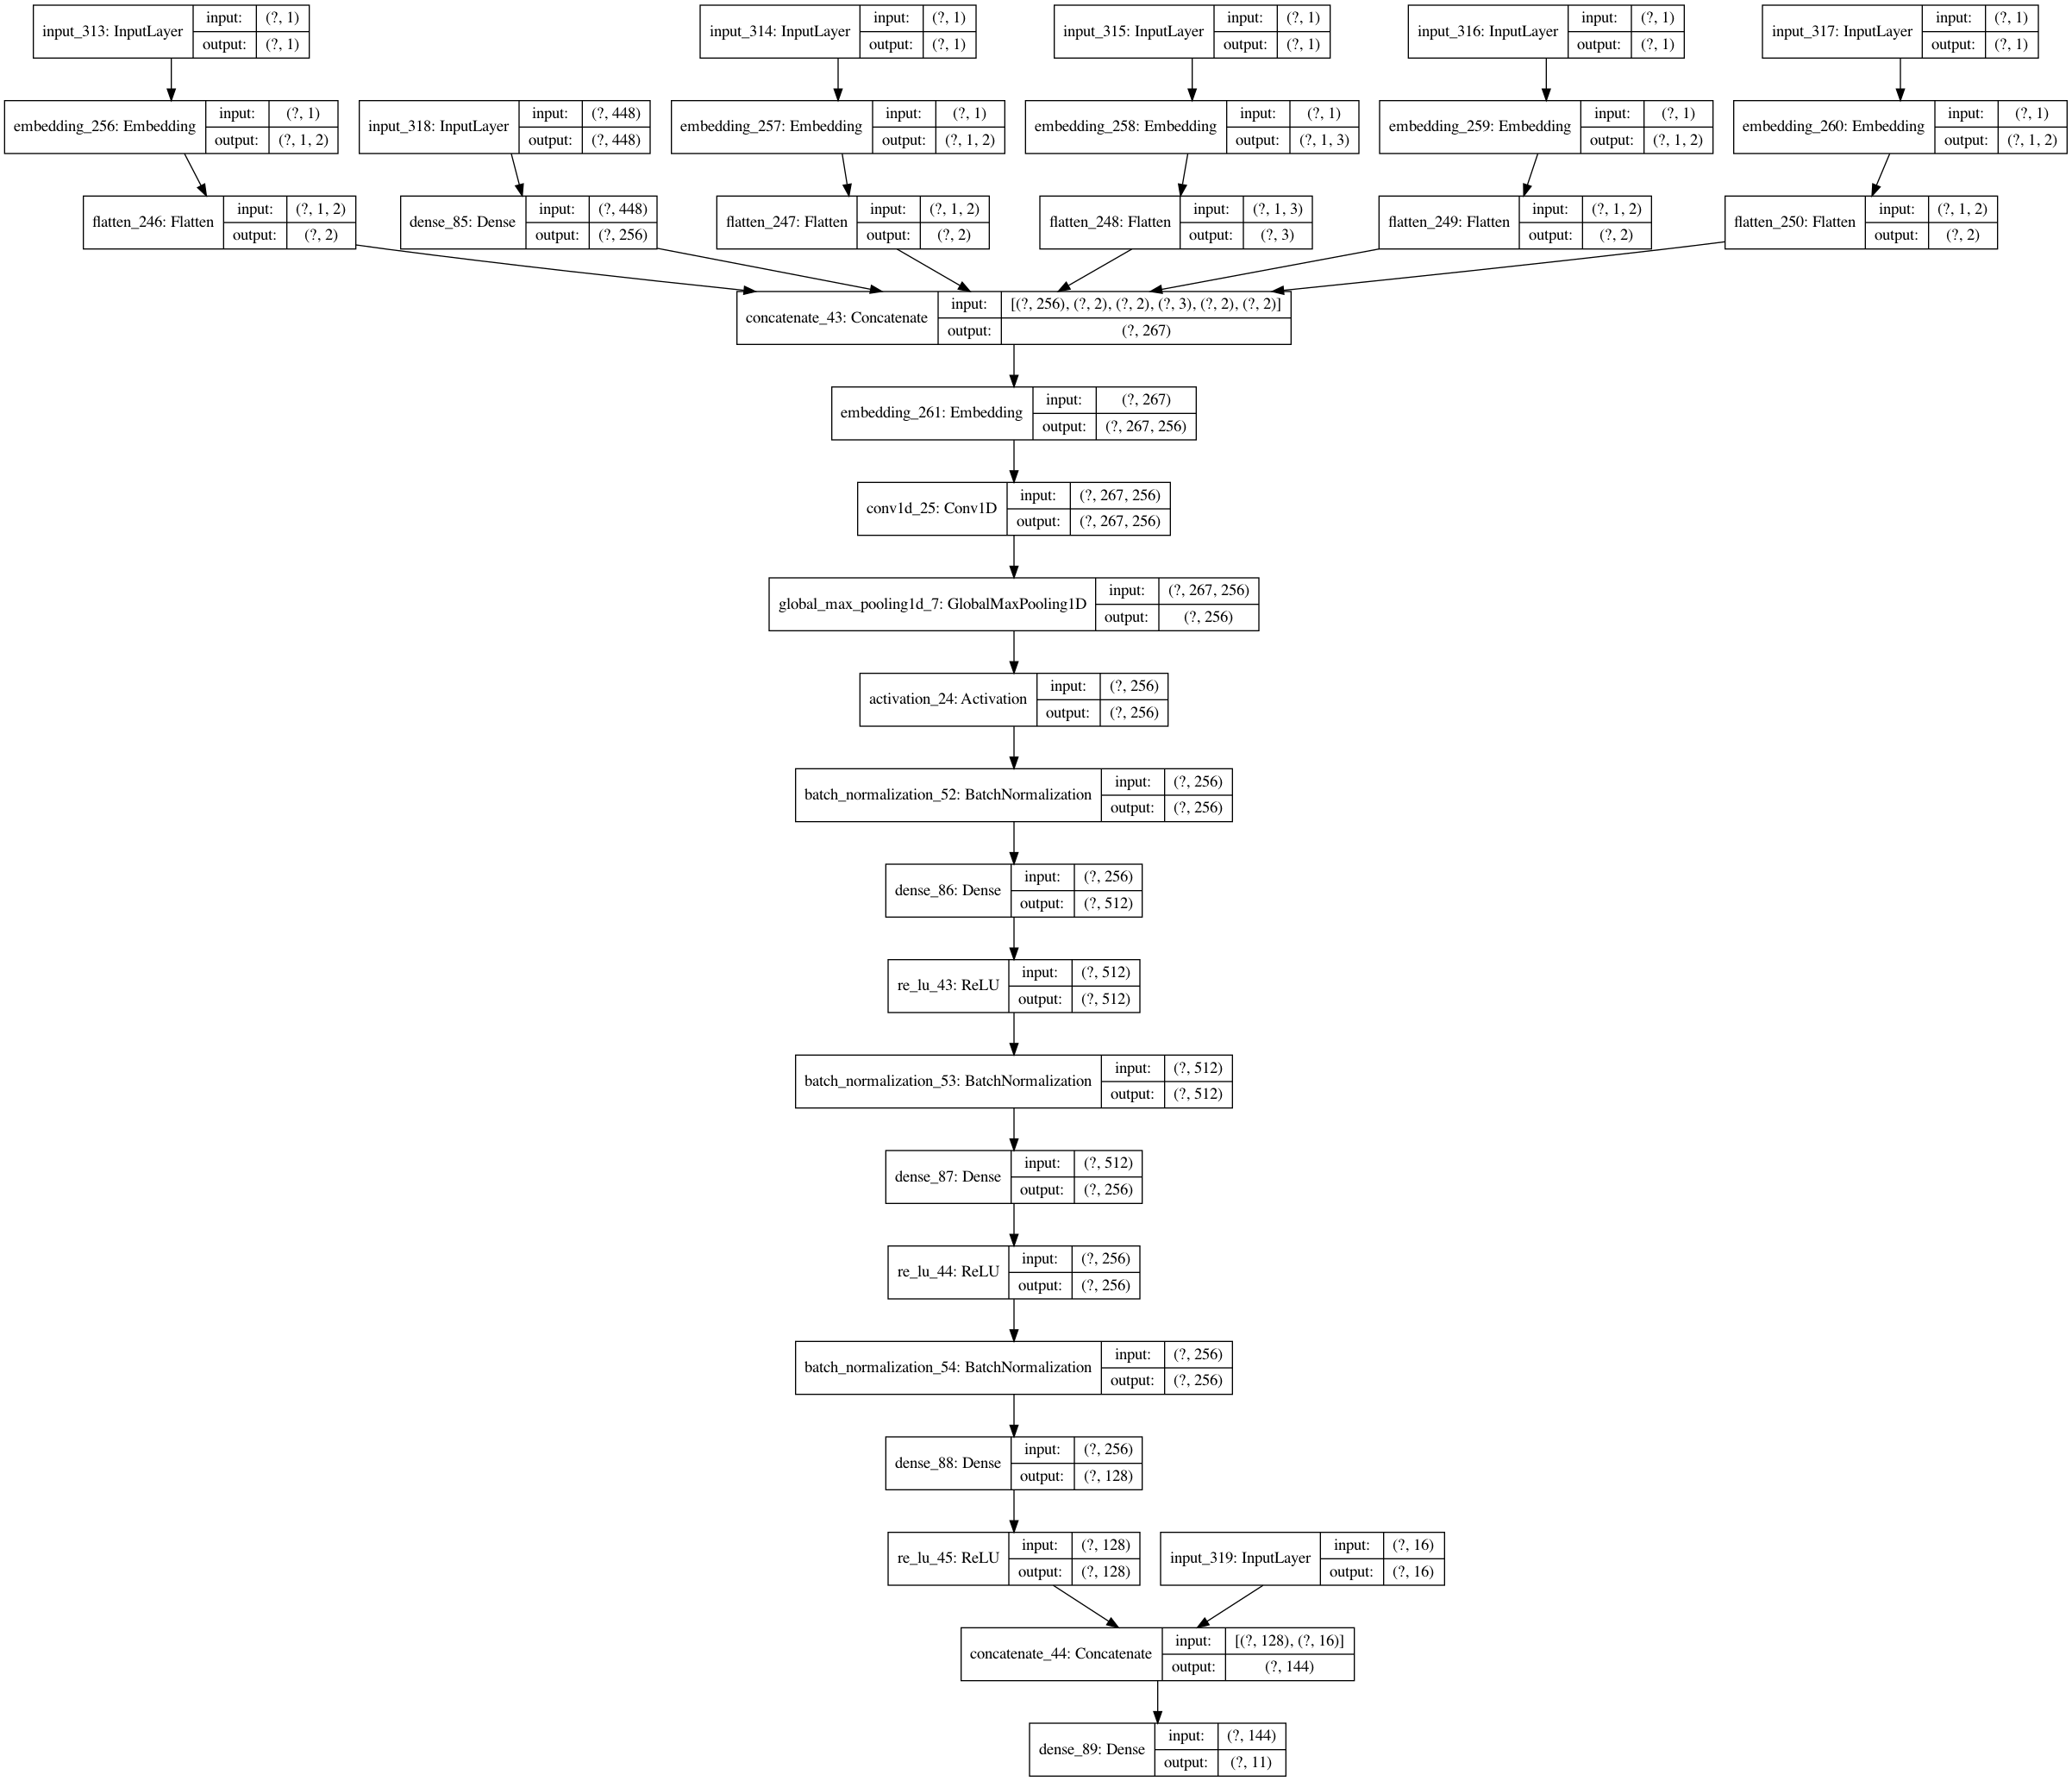

In [441]:
plot_model(model, show_shapes=True)

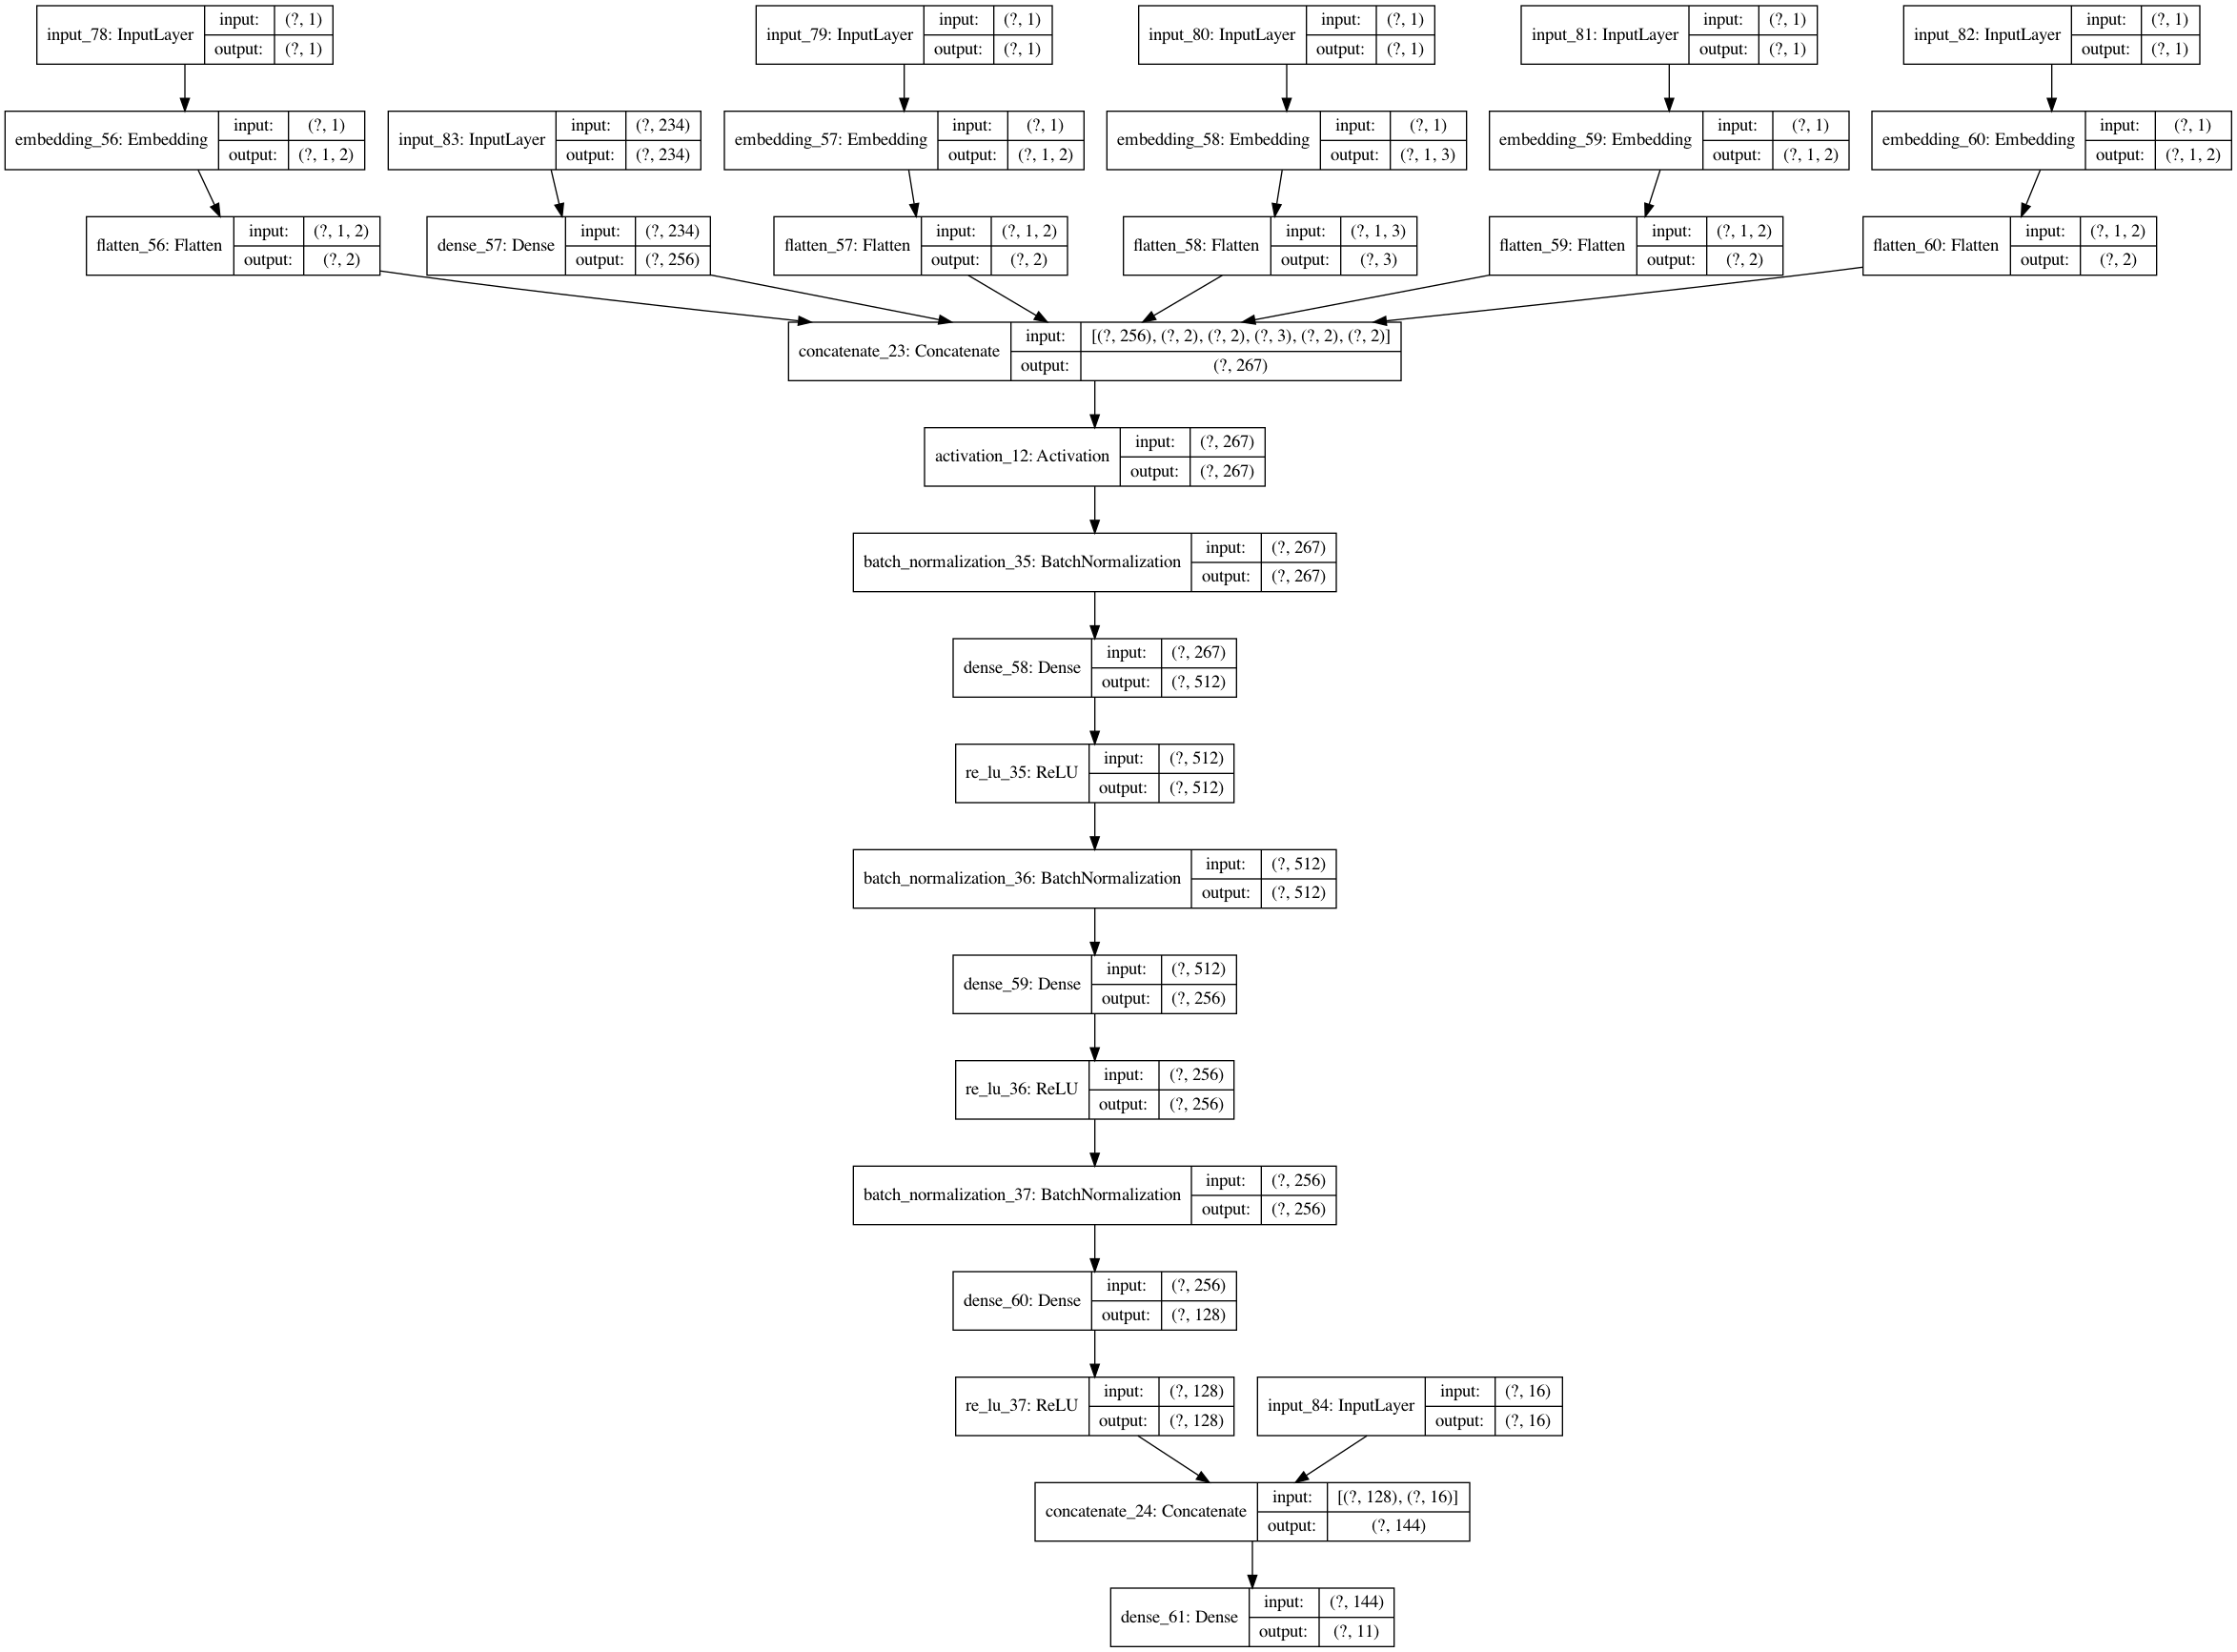

In [511]:
plot_model(model, show_shapes=True)